In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df_n = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
df_n

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


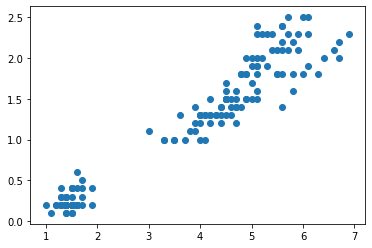

In [8]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [29]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
y_predicted = km.fit_predict(df_n[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
df_n['cluster'] = y_predicted
df_n.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'petal width (cm)')

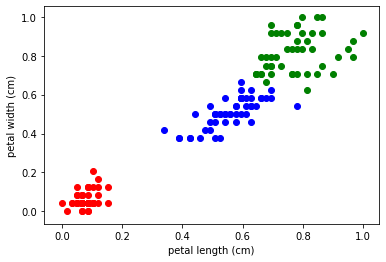

In [32]:
df_n1 = df_n[df_n.cluster == 0]
df_n2 = df_n[df_n.cluster == 1]
df_n3 = df_n[df_n.cluster == 2]

plt.scatter(df_n1['petal length (cm)'], df_n1['petal width (cm)'], color = 'red')
plt.scatter(df_n2['petal length (cm)'], df_n2['petal width (cm)'], color = 'green')
plt.scatter(df_n3['petal length (cm)'], df_n3['petal width (cm)'], color = 'blue')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [33]:
scaler = MinMaxScaler()
scaler.fit(df_n[['petal width (cm)']])
df_n['petal width (cm)'] = scaler.transform(df_n[['petal width (cm)']])

scaler.fit(df_n[['petal length (cm)']])
df_n['petal length (cm)'] = scaler.transform(df_n[['petal length (cm)']])
df_n

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [34]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df_n[['petal length (cm)', 'petal width (cm)']])
y_predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
df_n['cluster'] = y_predicted
df_n

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [36]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

Text(0, 0.5, 'petal width (cm)')

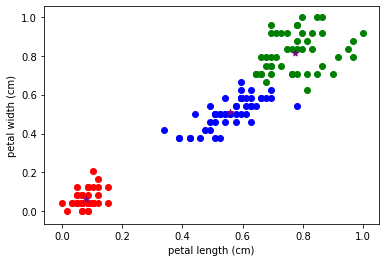

In [37]:
df_n1 = df_n[df_n.cluster == 0]
df_n2 = df_n[df_n.cluster == 1]
df_n3 = df_n[df_n.cluster == 2]

plt.scatter(df_n1['petal length (cm)'], df_n1['petal width (cm)'], color = 'red')
plt.scatter(df_n2['petal length (cm)'], df_n2['petal width (cm)'], color = 'green')
plt.scatter(df_n3['petal length (cm)'], df_n3['petal width (cm)'], color = 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [38]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df_n[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

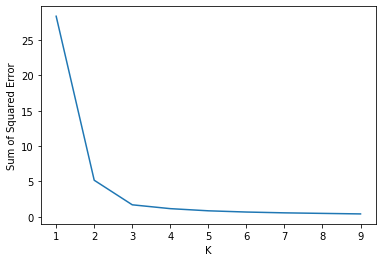

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)